In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs

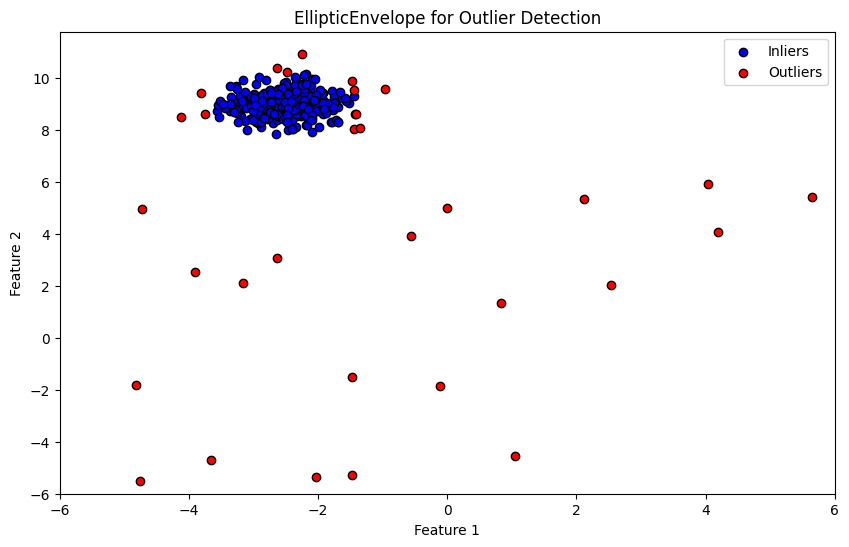

In [3]:
# Generate a dataset with some outliers
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.5, random_state=42)
outliers = np.random.uniform(low=-6, high=6, size=(20, 2))
X = np.concatenate([X, outliers], axis=0)

# Fit the Elliptic Envelope
envelope = EllipticEnvelope(contamination=0.1, random_state=42)
envelope.fit(X)

# Predict inliers (1) and outliers (-1)
y_pred = envelope.predict(X)

# Separate inliers and outliers
X_inliers = X[y_pred == 1]
X_outliers = X[y_pred == -1]

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(
    X_inliers[:, 0], X_inliers[:, 1], color="blue", label="Inliers", edgecolor="k"
)
plt.scatter(
    X_outliers[:, 0], X_outliers[:, 1], color="red", label="Outliers", edgecolor="k"
)

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(-6, 6, 100), np.linspace(-6, 6, 100))
Z = envelope.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="green")
plt.title("EllipticEnvelope for Outlier Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()